In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns 
from pandas.plotting import radviz
import pandas
from sklearn import tree
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.mixture import GaussianMixture
import pydotplus
import matplotlib.image as pltimg
from IPython.display import Image
import graphviz
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydot
from graphviz import Source
#from sklearn.datasets import load_iris
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Exercise 2: Decision Trees

This exercise uses the iris data set. The aim of this study is to investigate whether the four attributesof this set, namely sepallength, sepalwidth,petallength and petalwidth are appropriate to determinethe class of an iris flowerand to discover the phenomena of overfitting / underfitting. The classes present in the data set are: Iris-setosa, Iris-versicolor, andIris-virginica.

## 1. Read  the  data. 

In [4]:
df = pd.read_csv('~/Nextcloud/Uni/Maschinelles Lernen/iris.csv')
pd.set_option('display.max_rows', 50)
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Report the summary statistics. Which majority class can you use as a baseline? How good would be the prediction then?

In [5]:
iris = pd.read_csv('~/Nextcloud/Uni/Maschinelles Lernen/iris.csv')

In [6]:
# calculate index of attribute 
def getAttIndex (attr_name):
    if attr_name == 'sepallength':
        return 0
    elif attr_name == 'sepalwidth':
        return 1
    elif attr_name == 'petallength':
        return 2
    elif attr_name == 'petalwidth':
        return 3
    
    
#@param: Iris Name, attr to inspect @return: array of values in certain collumn 
def calc(iris_name, attr_name):
    #initialize return arr
    returnArr = []
    #convert to array
    np_arr = df.to_numpy()
    #for each flower
    for elem in np_arr:
        #if element is from wanted flower
        if elem[4] == iris_name:
            #add wanted att to return list
            returnArr.append(elem[getAttIndex(attr_name)])
    return returnArr

In [7]:
def median(list):
    return np.median(list)

def mode(list):
    return stats.mode(list)

def mean(list):
    mean1 = np.mean(list)
    mean2 = np.around(mean1,2)
    return mean2

def min(list):
    return np.min(list)

def max(list):
    return np.max(list)

def std_deviation(list):
    devi1 = np.std(list)
    devi2 = np.around(devi1,2)
    return devi2

## Summary Statistics:

In [8]:
name = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
attribute = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

for att in attribute:
    for n in name:
        data = calc(n, att)
        print(n, 'for attribute ', att)
        print('Median:',median(data))
        print('Mode: ',mode(data))
        print('Mean: ',mean(data))
        print('Min-Wert: ', min(data))
        print('Max-Wert: ',max(data))
        print('Standard Deviation: ',std_deviation(data),'\n')

Iris-setosa for attribute  sepallength
Median: 5.0
Mode:  ModeResult(mode=array([5.]), count=array([8]))
Mean:  5.01
Min-Wert:  4.3
Max-Wert:  5.8
Standard Deviation:  0.35 

Iris-virginica for attribute  sepallength
Median: 6.5
Mode:  ModeResult(mode=array([6.3]), count=array([6]))
Mean:  6.59
Min-Wert:  4.9
Max-Wert:  7.9
Standard Deviation:  0.63 

Iris-versicolor for attribute  sepallength
Median: 5.9
Mode:  ModeResult(mode=array([5.5]), count=array([5]))
Mean:  5.94
Min-Wert:  4.9
Max-Wert:  7.0
Standard Deviation:  0.51 

Iris-setosa for attribute  sepalwidth
Median: 3.4
Mode:  ModeResult(mode=array([3.4]), count=array([9]))
Mean:  3.42
Min-Wert:  2.3
Max-Wert:  4.4
Standard Deviation:  0.38 

Iris-virginica for attribute  sepalwidth
Median: 3.0
Mode:  ModeResult(mode=array([3.]), count=array([12]))
Mean:  2.97
Min-Wert:  2.2
Max-Wert:  3.8
Standard Deviation:  0.32 

Iris-versicolor for attribute  sepalwidth
Median: 2.8
Mode:  ModeResult(mode=array([3.]), count=array([8]))
Mean:

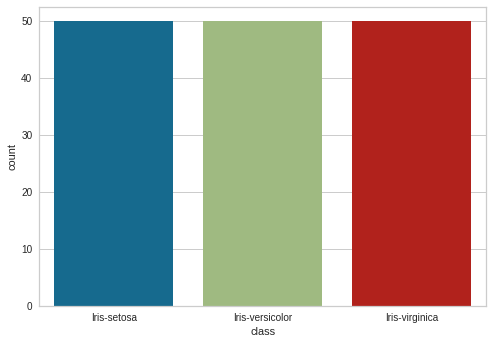

In [9]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('class',data=iris)
#ax.set_title('Iris Species Count')
plt.show()

**Beobachtungen:**
- es liegen jeweils 50 Proben zu den Irisarten vor
- Datensatz ist ausgeglichen


# KORREKTUR
- In diesem Beispiel ist die Wahl einer Majority class unrelevant da jede der 3 Klassen (Iris-setosa, Iris-versicolor, Iris-virginica) gewählt werden kann.Sie sind jeweils zu 33,3% vertreten und können ebenfalls mit gleicher Wahrscheinlichkeit bestimmt werden. Typischerweise wird an dieser Stelle jedoch Iris-setosa präferiert.

## 3. Explore your data with different visualizations. From this exploration, which assumption can you  make  concerning  the  four  attributes  to  predict  the  class  of  an  iris  flower?  Explain  your answer.

### 3.1. Histogram
### 3.2. Scatterplot
### 3.3. Boxplot
### 3.4. RadViz Plot


## 3.1. Histogram:

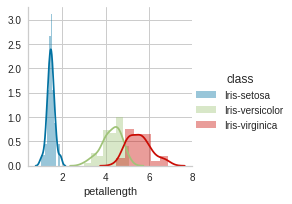

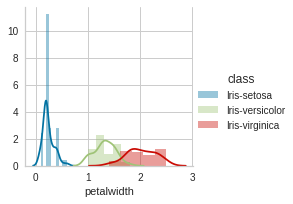

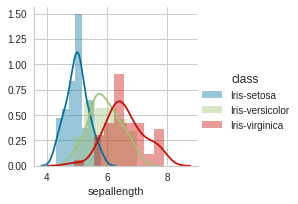

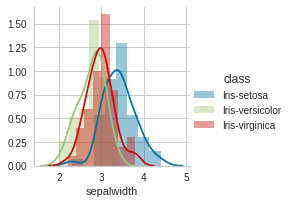

In [10]:
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"petallength").add_legend()
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"petalwidth").add_legend()
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"sepallength").add_legend()
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"sepalwidth").add_legend()
plt.show()

**Beobachtungen:**

- mit petallength und petalwidth kann die iris-setosa unterschieden werden, die Verteilung ist nicht gleichmäßig: beide Merkmale grenzen sich ab
- sepallength und sepalwidth überschneiden sich stark und di Iris Art kann nicht abgelesen werden 
- mit petallength kann Iris-setosa eindeutig abgegrenzt werden

## 3.2 Scatterplot

<Figure size 576x396 with 0 Axes>

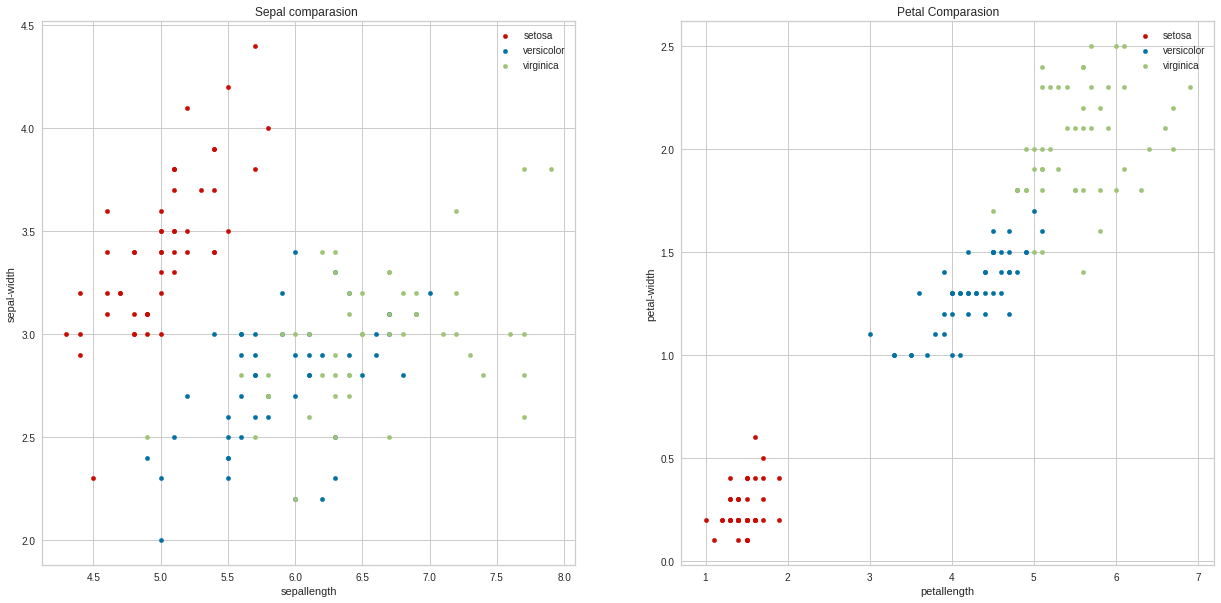

In [11]:
setosa=df[df['class']=='Iris-setosa']
versicolor =df[df['class']=='Iris-versicolor']
virginica =df[df['class']=='Iris-virginica']

plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="sepallength", y="sepalwidth", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepallength",y="sepalwidth",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepallength", y="sepalwidth", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petallength", y="petalwidth", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petallength",y="petalwidth",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petallength", y="petalwidth", kind="scatter", ax=ax[1], label='virginica', color='g')

_=ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
_=ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
_=ax[0].legend()
_=ax[1].legend()
# plt.show()
# plt.close()

**Beobachtungen:**

- ist petallength ≤ 2cm und petallwidth ≤ 0.8cm dann ist es die Art Iris-setosa
- ist petallength ≥ 3cm und ≤ 5.5cm und petalwidth  ≥ 1cm und ≤ 1.5cm dann ist es die Art Iris-versicolor
- weder noch, dann ist die Art Iris-virginica


- sepallength liefert aufgrund der Überschneidungen keine Ergebnisse
- anhand der sepalwidth kann die Iris-setosa noch unterschieden werden

## 3.3 Boxplot:

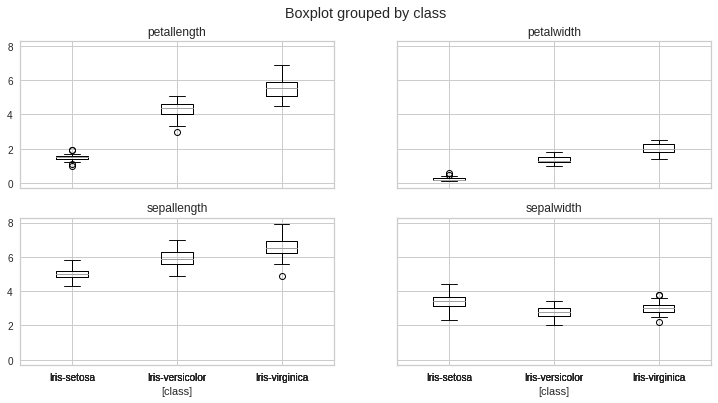

In [12]:
iris.boxplot(by="class", figsize=(12, 6))
pass

**Beobachtungen:**

sepallength:
- Iris-verginica größten Wertebereich, max 8cm 
- Ausreißer: ca. 5cm
----------------------------------------------------------------------
sepalwidth:
- Iris-setosa hat den größten Wertebereich
- sepalwidth weißt hier wenig Unterscheidungen zwischen den Arten auf
- Iris-virginica hat die höchste Anzahl an Ausreißern

----------------------------------------------------------------------
petalwidth:
- Iris-setosa hat einen sehr kleinen Wertebereich
----------------------------------------------------------------------
petallength
- Iris-setosa hat eine wesentlich geringere petallength (ca 1-2cm) als die anderen Arten
- Iris-virginica hat einen größeren Wertebereich als die beiden anderen Arten 
- Iris-setosa hat Ausreißer
- Iris-virginica hat die höchste Anzahl an Ausreißern




## 3.4 Radviz Plot:

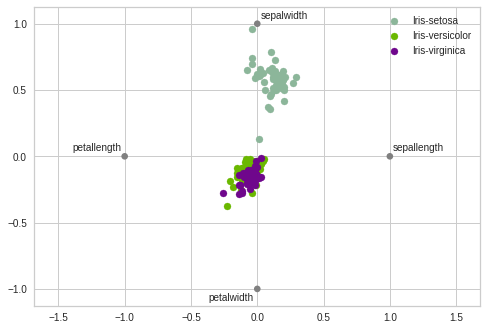

In [26]:
radviz(iris, "class")
plt.show()

**Beobachtung:**
- Radviz-Plot zeigt multivariate Verteilung der drei Arten
- Attribute in eiem Kreis dargestellt
- oberes Cluster zeigt Iris-setosa, identifizierbar anhand der sepalwidth
- Iris-versicolor und Iris-virginica überlappen sich und können nicht unterschieden werden (zu ähnliche Werte)


# KORREKTUR:
- Jedes betrachtete Element wird mit der funktion  ["normalize"](https://www.scikit-yb.org/en/latest/api/features/radviz.html ) auf die Skala [0,1] angepasst. So ist es möglich die Datenpunkte innerhalb eines einheitlichen Spektrums darzustellen.

## 4.  Clustering  as  classification:  Cluster  the  data  into  three  clusters  (you  are  free  to  try  out different clustering algorithmsand different attribute selection / transformation) and calculate the  accuracy  (proportions  of  objects  in  the  right  clusters).This  kindof  evaluation  is  called extrinsic: we have got the class as “ground truth” to compare the clusters with.

### K Means

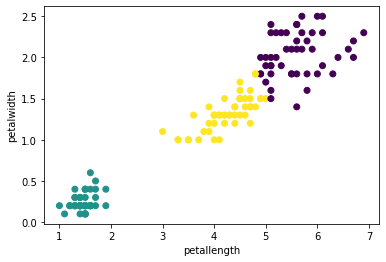

In [76]:
from sklearn.cluster import KMeans

X = iris_data[: , 2:4]

num_clusters = 3

#calculate k_means with @num_clusters clusters
kmeans = KMeans(n_clusters=num_clusters).fit(X)
labels = kmeans.labels_

plt.xlabel('petallength')
plt.ylabel('petalwidth')
_ = plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_.astype(float))

### EM Clustering

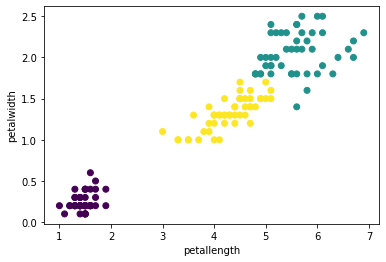

In [77]:
num_clusters = 3
iris_data = df.to_numpy()

X = iris_data[: , 2:4]

gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(X)
labels = gmm.predict(X)

plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.scatter(X[:, 0], X[:, 1], c=labels)

### X Means

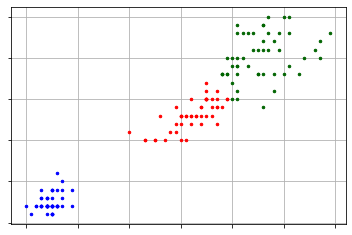

In [81]:
import sys
sys.path.append("/home/kilkla/.local/lib/python3.7/site-packages/")
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans

X = iris_data[:, 2:4]

amount_initial_centers = 3
amount_max_centers = 3
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()
xmeans_instance = xmeans(X, initial_centers, amount_max_centers)
xmeans_instance.process()

clusters = xmeans_instance.get_clusters()

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)
_ = visualizer.show()

### Measuring cluster quality

BCUBED PRECISION:

Anzahl an Pflanzen der Klasse K in einem Cluster C - 1
__________________________________________________

Anzahl aller Elemente in dem Cluster - 1


In [83]:
def getObjectForNum(elem):            
    return(iris_data[elem])


def correctness_of_elem(elem, cluster):
    num_elem_in_the_cluster=0
    num_elem_same_class=0
    
    class_des_elem = getObjectForNum(elem)[4]
    
    for other_elem in cluster:
        if (getObjectForNum(other_elem)[4] == class_des_elem):
            num_elem_same_class = num_elem_same_class + 1
            
        num_elem_in_the_cluster = num_elem_in_the_cluster + 1

    return ((num_elem_same_class - 1) / abs(num_elem_in_the_cluster - 1 ))


cluster_count = 1
for cluster in clusters:
    print("------------------ CLUSTER ", cluster_count, " -----------------")
    for elem in cluster:
        print("Element #", elem, "| BCubed Precision :" ,correctness_of_elem(elem, cluster))
        print("")
    
    cluster_count = cluster_count + 1

------------------ CLUSTER  1  -----------------
Element # 50 | BCubed Precision : 0.9787234042553191

Element # 51 | BCubed Precision : 0.9787234042553191

Element # 52 | BCubed Precision : 0.9787234042553191

Element # 53 | BCubed Precision : 0.9787234042553191

Element # 54 | BCubed Precision : 0.9787234042553191

Element # 55 | BCubed Precision : 0.9787234042553191

Element # 56 | BCubed Precision : 0.9787234042553191

Element # 57 | BCubed Precision : 0.9787234042553191

Element # 58 | BCubed Precision : 0.9787234042553191

Element # 59 | BCubed Precision : 0.9787234042553191

Element # 60 | BCubed Precision : 0.9787234042553191

Element # 61 | BCubed Precision : 0.9787234042553191

Element # 62 | BCubed Precision : 0.9787234042553191

Element # 63 | BCubed Precision : 0.9787234042553191

Element # 64 | BCubed Precision : 0.9787234042553191

Element # 65 | BCubed Precision : 0.9787234042553191

Element # 66 | BCubed Precision : 0.9787234042553191

Element # 67 | BCubed Precision :

# KORREKTUR:
**falsch zugeordnete Elemente:**
- Element # 106 | BCubed Precision : 0.0
- Element # 70 | BCubed Precision : 0.0392156862745098
- Element # 77 | BCubed Precision : 0.0392156862745098
- Element # 83 | BCubed Precision : 0.0392156862745098


## 5. Classify your data with a decision tree without pruning using information gain and then Gini index  (more  if  you  wish). Report  all  the  trees  you  have  obtained,  give  for  each  of  them  the height or maximal depth (the root has the height 0), the total number of nodes and number of leaves as well as the number of rules to predict setosa, virginica and versicolor.

In [57]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
#split dataset into two types of variables dependent(or target variable) and independent variable(or feature variables)
feature_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
target = ['class']
X = df[feature_cols]
y = df[target]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy_test = clf.score(X_test, y_test)

print('Accuracy, Testset: ', round(accuracy_test*100,5), '%')

Accuracy, Testset:  95.55556 %


Wir erreichen eine Genauigkeit von 95% im Testset. Das heißt der Testsatz ist gut geeignet.

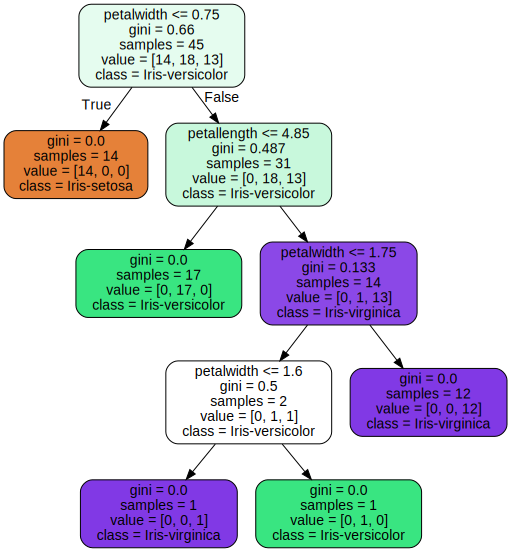

In [74]:
feature_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
target_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
X = df[feature_cols]
y = df[target]

clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_test, y_test)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols,class_names=target_name, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

In [60]:
print('Max Depth of tree: ',clf.get_depth())
print('Number of nodes: ',clf.tree_.node_count)
print('Number of leaves: ',clf.get_n_leaves())

Max Depth of tree:  4
Number of nodes:  9
Number of leaves:  5


In [61]:
tree_rules = export_text(clf, feature_names=list(X_train.columns))
print(tree_rules)

|--- petalwidth <= 0.75
|   |--- class: Iris-setosa
|--- petalwidth >  0.75
|   |--- petallength <= 4.85
|   |   |--- class: Iris-versicolor
|   |--- petallength >  4.85
|   |   |--- petalwidth <= 1.75
|   |   |   |--- sepallength <= 6.35
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepallength >  6.35
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petalwidth >  1.75
|   |   |   |--- class: Iris-virginica



# KORREKTUR
**Number of Rules**
- Iris-setosa: 1
- Iris-virginica: 2
- Iris-versicolor: 2


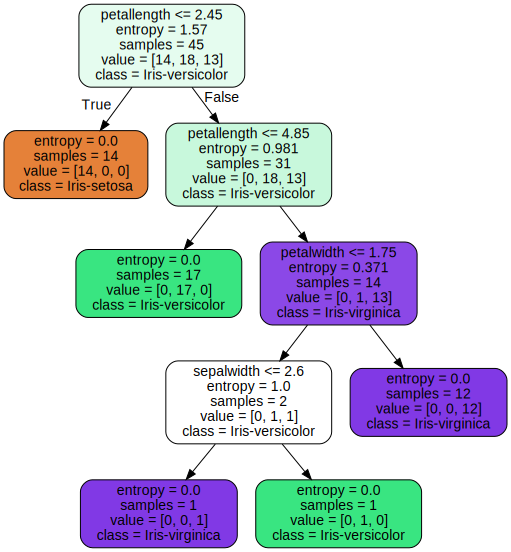

In [62]:
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1 = clf1.fit(X_test, y_test)
dot_data = tree.export_graphviz(clf1, out_file=None, feature_names=feature_cols,class_names=target_name, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph


In [63]:
print('Max Depth of tree: ',clf1.get_depth())
print('Number of nodes: ',clf1.tree_.node_count)
print('Number of leaves: ',clf1.get_n_leaves())

Max Depth of tree:  4
Number of nodes:  9
Number of leaves:  5


# KORREKTUR

**Beobachtungen**
- Die Bäume mit den Entscheidungen gini index und information gain unterscheiden sich nicht
- Problem hier: Bäume lernen einzelne Objekte auswendig 
- bis zum split auf depth 2 (petalwidth <=1.75) ist der größte Teil des Datensatzes korrekt zugeordnet: folgende 3 Blätter beziehen sich nur noch auf wenige Objekte, am Ende sogar nur auf ein Objekt
- Gefahr des Overfitting besteht: für ein optimales Modell --> Pruning

In [64]:
tree_rules = export_text(clf1, feature_names=list(X_train.columns))
print(tree_rules)

|--- petallength <= 2.45
|   |--- class: Iris-setosa
|--- petallength >  2.45
|   |--- petallength <= 4.85
|   |   |--- class: Iris-versicolor
|   |--- petallength >  4.85
|   |   |--- petalwidth <= 1.75
|   |   |   |--- sepalwidth <= 2.60
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepalwidth >  2.60
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petalwidth >  1.75
|   |   |   |--- class: Iris-virginica



# KORREKTUR
**Number of Rules**
- Iris-setosa: 1
- Iris-virginica: 2
- Iris-versicolor: 2


## 6. Look in the book (or somewhere else) what overfitting means and report the meaning. Which trees exhibit overfitting?

"Overfitting" happens when a model is trained "too good" on a set of data, so that it fits even the most specific branches with many features (also noisy data or outliers). 

Pruned Trees (which prevent Overfitting) are usually faster and better in at correctly classifying data as they are less complex and better aplicable on other than the trained data. Pruned Trees often have a significantly higher accuracy as they don't have to deal with noisy data or outliers.

Almost every Tree or ML Algorythm can suffer of overfitting.


# KORREKTUR:
- Overfitting in den Bäumen s.o.: 
bis zum split auf depth 2 (petalwidth <=1.75) ist der größte Teil des Datensatzes korrekt zugeordnet: folgende 3 Blätter beziehen sich nur noch auf wenige Objekte, am Ende sogar nur auf ein Objekt

## 7. Read in the book the section “8.2.3 Tree Pruning” p. 344. Explore the possibilities “Apply pruning”  and  “Apply  prepruning”  with  either  “information  gain”  or  “Gini  Index”.  Give  a pruned  tree  that  seems  neither  overfitted  nor  underfitted to you  and  explain  how you have generated it with Jupyter Notebook. Note: we will learn how to automatize those steps with cross-validation and grid search.

In [85]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #path hat 2 werte: alpha und impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alpha = ccp_alphas[:-1] #ohne max alpha

In [86]:
clf_dts=[] #array für decision trees
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

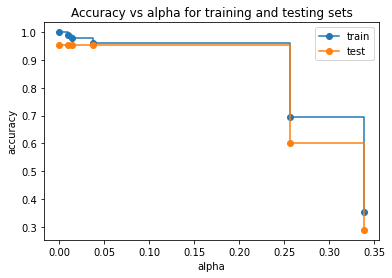

In [87]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

- optimaler Punkt für Pruning liegt zwischen 0 und 0.25, danach wird der Baum zu startk beschnitten



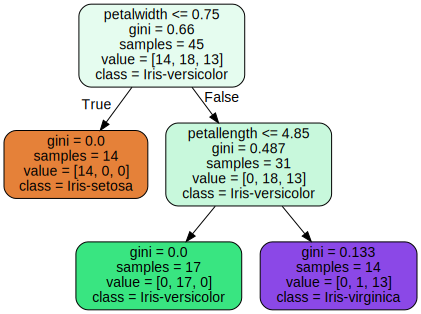

In [70]:
clf3 = DecisionTreeClassifier(ccp_alpha=0.15)
clf3 = clf3.fit(X_test, y_test)
dot_data = tree.export_graphviz(clf3, out_file=None, feature_names=feature_cols,class_names=target_name, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

# KORREKTUR:
### Vergleich zu den unbeschnittenen Bäumen (s.o. Exercise 5): 
- hier lernen nicht einzelne Objekte auswendig 
- Baum ist generalisiert: unterer Teil fällz weg (ab gini 0.133)
- minimale Fehlertoleranz wird in Kauf genommen um das Modell effizient zu zu halten
- aufgrund des Prunings ist der Baum meistens schneller und besser im korrekten Klassifizieren von Daten
- sind weniger komplex und effektiver anwendbar auf Testdaten